This dataset includes all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) from 2006 to the end of last year (2019). For additional details, please see the attached data dictionary in the ‘About’ section.

link: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

- Objetivo:

- Classificar se determinada é segura ou não com relação a ocorrênciad crimes de  assalto ou roubo.

## 1 - Carregando os dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('delitos_novo_nyc.csv',sep=',')

In [3]:
df.head()

,data_da_ocorr,hora_da_ocorr,conclusao,delito,desc_delito,nivel_delito,loc_esp_delito,desc_instalacoes,bairro,latitude,...,dia,mes,ano,dia_da_semana,idade_vitima,raca_vitima,sexo_vitima,noite,assalto,fds
0,2006-01-01,08:00:00,1,SEX CRIMES,"SEXUAL ABUSE 3,2",contravencao,dentro,RESIDENCE-HOUSE,Queens,40.679700,...,1,1,2006,domingo,<18,BLACK,F,0,0,0
1,2006-01-01,00:01:00,1,FRAUDS,"FRAUD,UNCLASSIFIED-MISDEMEANOR",contravencao,dentro,RESIDENCE - APT. HOUSE,Brooklyn,40.675044,...,1,1,2006,domingo,45-64,WHITE HISPANIC,M,1,0,0
2,2006-01-01,07:00:00,1,THEFT-FRAUD,"FRAUD,UNCLASSIFIED-FELONY",crime,dentro,RESIDENCE-HOUSE,Staten_Island,40.632779,...,1,1,2006,domingo,25-44,WHITE HISPANIC,M,0,0,0
3,2006-01-01,00:01:00,1,THEFT-FRAUD,"FRAUD,UNCLASSIFIED-FELONY",crime,dentro,COMMERCIAL BUILDING,Brooklyn,40.602071,...,1,1,2006,domingo,25-44,WHITE,M,1,0,0
4,2006-01-01,00:00:00,1,SEX CRIMES,"SEXUAL ABUSE 3,2",contravencao,dentro,RESIDENCE-HOUSE,Bronx,40.856163,...,1,1,2006,domingo,25-44,BLACK,F,1,0,0


- Excluindo os delitos com poucos registros.

In [4]:
drop = list(dict(df.delito.value_counts().tail(11)).keys())
df = df.set_index('delito')
df = df.drop(drop)
df = df.reset_index()

In [5]:
drop = list(dict(df.desc_instalacoes.value_counts().tail(3)).keys())
df = df.set_index('desc_instalacoes')
df = df.drop(drop)
df = df.reset_index()

In [6]:
df.assalto.value_counts(normalize=True)

0    0.557269
1    0.442731
Name: assalto, dtype: float64

- Analisando os registros considerados ou não como assalto.

In [7]:
df_assalto = df[df['assalto']==1]
df_sem_assalto = df[df['assalto']==0]

In [8]:
lista_assalto = ['PETIT LARCENY',
       'GRAND LARCENY OF MOTOR VEHICLE', 'ROBBERY',
       'GRAND LARCENY', 'UNAUTHORIZED USE OF A VEHICLE']

df_assalto['assalto'] = df_assalto['delito'].apply(lambda x: 1 if x in lista_assalto else 0)

/usr/local/envs/py3env/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
lista_assalto = ["BURGLARY","BURGLAR'S TOOLS","POSSESSION OF STOLEN PROPERTY","PETIT LARCENY OF MOTOR VEHICLE"]

df_sem_assalto['assalto'] = df_sem_assalto['delito'].apply(lambda x: 1 if x in lista_assalto else 0)

/usr/local/envs/py3env/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [10]:
df_completo = pd.concat([df_assalto,df_sem_assalto])

In [11]:
df_completo.assalto.value_counts(normalize=True)

0    0.690334
1    0.309666
Name: assalto, dtype: float64

In [12]:
df_completo = df_completo.reset_index(drop=True)

- Selecionando as colunas para a modelagem.

In [13]:
dados_ml = df_completo[['hora','noite','dia','dia_da_semana','mes','fds',
                  'bairro','desc_instalacoes','sexo_vitima',
                  'latitude', 'longitude','assalto']]

In [14]:
dados_ml = dados_ml.dropna()

In [15]:
dados_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488514 entries, 0 to 490482
Data columns (total 12 columns):
hora                488514 non-null int64
noite               488514 non-null int64
dia                 488514 non-null int64
dia_da_semana       488514 non-null object
mes                 488514 non-null int64
fds                 488514 non-null int64
bairro              488514 non-null object
desc_instalacoes    488514 non-null object
sexo_vitima         488514 non-null object
latitude            488514 non-null float64
longitude           488514 non-null float64
assalto             488514 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 48.5+ MB


- Tratando variáveis categóricas.

In [16]:

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

dados_ml['dia_da_semana'] = lb.fit_transform(dados_ml['dia_da_semana'])
dados_ml['bairro'] = lb.fit_transform(dados_ml['bairro'])
dados_ml['desc_instalacoes'] = lb.fit_transform(dados_ml['desc_instalacoes'])
dados_ml['sexo_vitima'] = lb.fit_transform(dados_ml['sexo_vitima'])

# dados_ml = pd.get_dummies(dados_ml)

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# for col in dados_ml.columns:
#   if col != "assalto":
#     dados_ml[col] = scaler.fit_transform(np.array(dados_ml[col]).reshape(-1,1))



In [17]:
dados_ml.head()

,hora,noite,dia,dia_da_semana,mes,fds,bairro,desc_instalacoes,sexo_vitima,latitude,longitude,assalto
0,10,0,13,5,1,0,1,43,0,40.686996,-73.980815,0
1,23,1,19,2,1,0,0,61,0,40.857287,-73.888458,1
3,15,0,9,2,2,0,0,61,0,40.809971,-73.917826,1
4,23,1,20,4,2,0,2,4,1,40.722136,-73.996697,0
5,19,1,21,6,2,0,3,61,0,40.754794,-73.919096,1


### Separando os dados de treino e teste.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = dados_ml.drop('assalto',axis=1)
Y = dados_ml['assalto']

In [20]:
X_treino, X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

## 4.2 **Testando algoritmos**

In [21]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_treino, Y_treino)
y_pred = dummy_clf.predict(X_teste)
acuracia = dummy_clf.score(X_teste, Y_teste) * 100

print('A acurácia do dummy mostfrequent foi %.2f%%' % acuracia)

A acurácia do dummy mostfrequent foi 69.09%


Text(33,0.5,'Real ( 1 ou 0)')

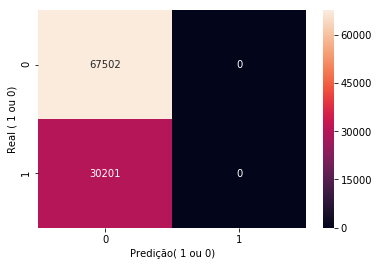

In [22]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [23]:
from sklearn.metrics import  roc_auc_score,roc_curve, classification_report
from sklearn import metrics

y_proba = dummy_clf.predict_proba(X_teste)
roc_auc_score(Y_teste, y_proba[:,1])

0.5

In [24]:
print(classification_report(Y_teste, y_pred))

             precision    recall  f1-score   support

          0       0.69      1.00      0.82     67502
          1       0.00      0.00      0.00     30201

avg / total       0.48      0.69      0.56     97703



/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Triagem com outros modelos

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

lista_classificacores = [ LogisticRegression(),
                         GaussianNB(),
                         RandomForestClassifier(),
                         XGBClassifier()]

for clf in lista_classificacores:
  print(clf.__class__.__name__)
  clf.fit(X_treino, Y_treino)

  print('Acuracia')
  train_acc = clf.score(X_treino, Y_treino)
  test_acc = clf.score(X_teste, Y_teste)
  print('Treino:', train_acc)
  print('Teste:', test_acc)

  print('ROC AUC')

  y_proba_treino = clf.predict_proba(X_treino)
  roc_treino = roc_auc_score(Y_treino, y_proba_treino[:, 1])
  print('Treino', roc_treino)

  y_proba_teste = clf.predict_proba(X_teste)
  roc_teste = roc_auc_score(Y_teste, y_proba_teste[:, 1])
  print('Test', roc_teste)
  print('='*80)

/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LogisticRegression
Acuracia
Treino: 0.6908915051009311
Teste: 0.6908897372649765
ROC AUC
Treino 0.5819880903663405
Test 0.5820937525361114
GaussianNB
Acuracia
Treino: 0.6772122586109398
Teste: 0.6770621168234343
ROC AUC
Treino 0.6144106585467347
Test 0.6113555216610589
RandomForestClassifier
Acuracia
Treino: 0.9774315461949638
Teste: 0.68433927310318
ROC AUC
Treino 0.9989144782115207
Test 0.6362605567830594
XGBClassifier
Acuracia


/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Treino: 0.6998779461171768
Teste: 0.698607002855593
ROC AUC
Treino 0.6805925021353013
Test 0.6780592290255036


- Validação cruzada.

In [26]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score
lista_classificacores = [ LogisticRegression(),
                         GaussianNB(),
                         RandomForestClassifier(),
                         XGBClassifier()]


for clf in lista_classificacores:
  print(clf.__class__.__name__)
  clf.fit(X_treino, Y_treino)
  train_acc = clf.score(X_treino, Y_treino)
  val_score = cross_val_score(clf, X_treino, Y_treino, cv=5)
  test_acc = clf.score(X_teste, Y_teste)
  print('Treino:', train_acc)
  print('Validation score', val_score.mean())
  print('Teste:', test_acc)

  print('ROC AUC')

  y_proba_treino = clf.predict_proba(X_treino)
  roc_treino = roc_auc_score(Y_treino, y_proba_treino[:, 1])
  print('Treino', roc_treino)

  y_proba_teste = clf.predict_proba(X_teste)
  roc_teste = roc_auc_score(Y_teste, y_proba_teste[:, 1])
  print('Test', roc_teste)
  print('='*80)

LogisticRegression
Treino: 0.6908915051009311
Validation score 0.6908915051309273
Teste: 0.6908897372649765
ROC AUC
Treino 0.5819880903663405
Test 0.5820937525361114
GaussianNB
Treino: 0.6772122586109398
Validation score 0.6771994707805264
Teste: 0.6770621168234343
ROC AUC
Treino 0.6144106585467347
Test 0.6113555216610589
RandomForestClassifier
Treino: 0.9772524314822254
Validation score 0.6818666840783336
Teste: 0.6829165941680398
ROC AUC
Treino 0.9989440338896106
Test 0.6354572083650408
XGBClassifier
Treino: 0.6998779461171768
Validation score 0.6989312047570306
Teste: 0.698607002855593
ROC AUC
Treino 0.6805925021353013
Test 0.6780592290255036


# Ajustando o XGBClassifier.

In [27]:
# clf = XGBClassifier(seed=42)
clf = XGBClassifier(max_depth=15,n_estimators=250,subsample=0.5,seed=42)

In [28]:
clf.fit(X_treino, Y_treino)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=250, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=True, subsample=0.5)

In [29]:
y_pred = clf.predict(X_teste)
acuracia = clf.score(X_teste, Y_teste) * 100

print('A acurácia do XGBclassifier foi %.2f%%' % acuracia)

A acurácia do XGBclassifier foi 69.85%


Text(33,0.5,'Real ( 1 ou 0)')

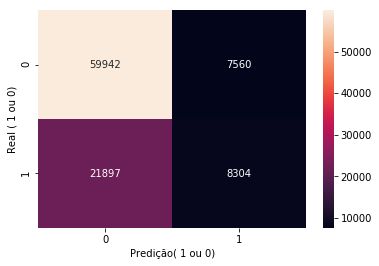

In [30]:
cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [31]:
y_proba = clf.predict_proba(X_teste)[:,1]
roc_auc = roc_auc_score(Y_teste, y_proba)
roc_auc

0.6790286656245323

In [32]:
print(classification_report(Y_teste, y_proba>0.5))

             precision    recall  f1-score   support

          0       0.73      0.89      0.80     67502
          1       0.52      0.27      0.36     30201

avg / total       0.67      0.70      0.67     97703



# Austando o RandomForestClassifier.

RandomForestClassifier(criterion='entropy',class_weight='balanced',max_features="sqrt",
                             n_estimators=250,max_depth=12, random_state=42)
                             
RandomForestClassifier(criterion='entropy',class_weight='balanced',max_features="log2",
                             n_estimators=250,max_depth=12, random_state=42)
                           
RandomForestClassifier(criterion='entropy',class_weight='balanced',max_features="log2",
                             n_estimators=250,max_depth=12, random_state=42)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
clf = RandomForestClassifier(criterion='entropy',
                             class_weight='balanced',
                             max_features="log2",
                             max_depth=15,
                             n_estimators=50,
                             random_state=42)
clf.fit(X_treino, Y_treino)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=15, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [35]:
y_pred = clf.predict(X_teste)
acuracia = clf.score(X_teste, Y_teste) * 100

print('A acurácia do RandomForestclassifier foi %.2f%%' % acuracia)

A acurácia do RandomForestclassifier foi 63.58%


Text(33,0.5,'Real ( 1 ou 0)')

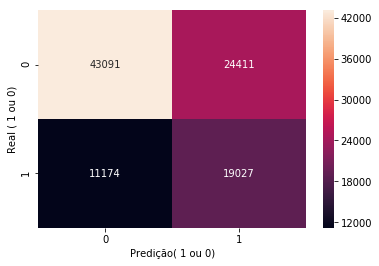

In [36]:
cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [37]:
y_proba = clf.predict_proba(X_teste)[:,1]
roc_auc = roc_auc_score(Y_teste, y_proba)
roc_auc

0.6847691023606917

In [38]:
print(classification_report(Y_teste, y_proba>0.5))

             precision    recall  f1-score   support

          0       0.79      0.64      0.71     67502
          1       0.44      0.63      0.52     30201

avg / total       0.68      0.64      0.65     97703



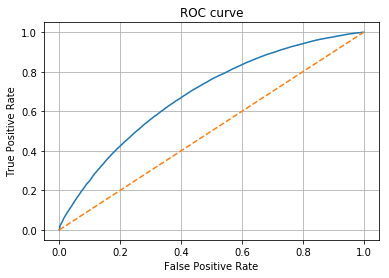

In [39]:
fpr, tpr, thresholds = metrics.roc_curve(Y_teste, y_proba)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

 - Visualizando árvore de decisão de baixa profundidade.

In [56]:
# from sklearn.tree import plot_tree


# plt.figure(figsize=(20,10))
# annotations = plot_tree(clf.estimators_[0],
#                         feature_names=dados_ml.drop('conclusao',axis=1).columns,
#                         filled=True)

 - Salvando o modelo

In [85]:
import pickle

output = open('classificacao_assalto', 'wb')
pickle.dump(clf, output)
output.close()